In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

from scipy.stats import gaussian_kde as kde

In [3]:
def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='Reds').to_rgba( val ) for val in vals]

    return colours

**sub_index:**
'DeadMic':0
'DeadEnz':1
'Cellulose':2
'Hemicellulose':3
'Starch':4
'Chitin':5
'Lignin':6
'Protein1':7
'Protein2':8
'Protein3':9
'OrgP1':10
'OrgP2':11

In [4]:
Subindex = 2 # index only the cellulose data

# Day = 140

## Substrate

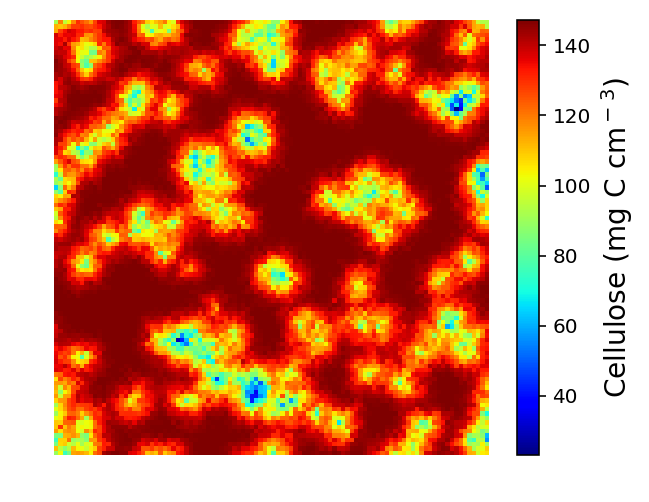

In [6]:
Substrate = pd.read_csv('Substrate_140.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)

plt.figure(figsize=(5, 4))#, facecolor='w', edgecolor='k')
plt.grid(linestyle='')


xx = plt.imshow(Substrate_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)


#plt.savefig('Substrate_Distribution_140.pdf',bbox_inches='tight')

# Enzyme

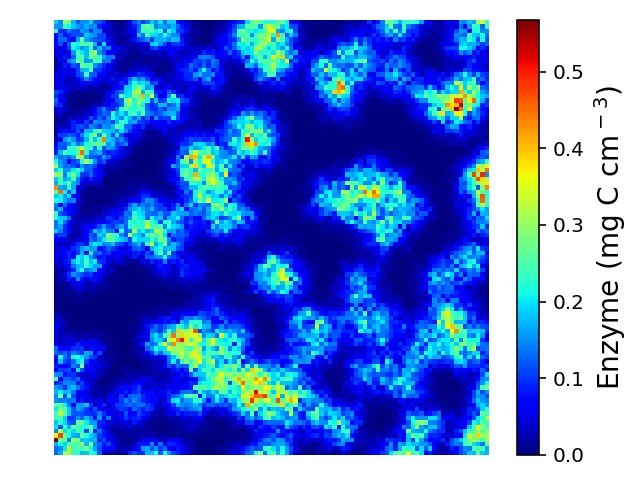

In [86]:
Enzyme = pd.read_csv('Enzyme_140.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)


plt.figure(figsize=(5, 4))

xx = plt.imshow(Enzyme_c_grid,cmap='jet')
plt.axis('off')


cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Enzyme (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Enzyme_Distribution_140.pdf',bbox_inches='tight')

# Rate

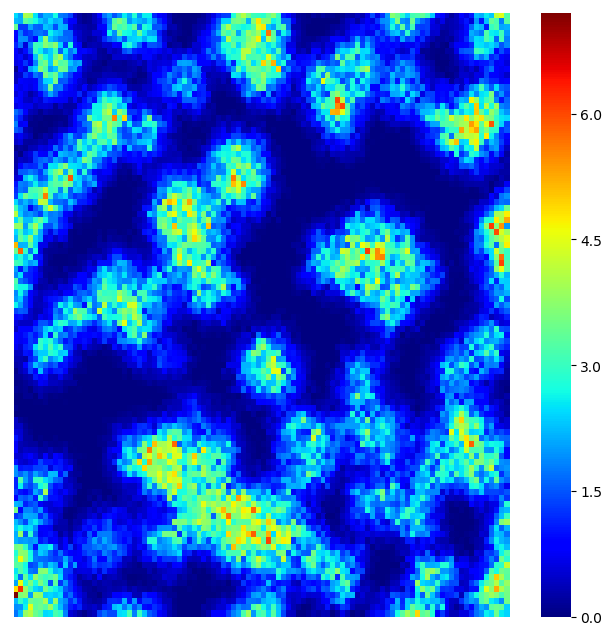

In [87]:
Rate = pd.read_csv('DecayRates_140.csv',index_col = 0)

Rate_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid[i-1] = Rate.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Rate_Grid)
df.columns = ['C']

Rate_c = df['C']
Rate_c_grid = Rate_c.copy().values.reshape(100,100)

plt.figure(figsize = (8,8),dpi = 50) #figsize = (10,8)
sns.heatmap (Rate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

In [88]:
Rate_Sub_Enz = pd.DataFrame({"Rate":Rate_c,'Substrate':Substrate_c,'Enzyme':Enzyme_c})
Rate_Sub_Enz.head()
#Rate_Sub_Enz.to_csv('Cellulose_Rate_Sub_Enz_140.csv')

,Rate,Substrate,Enzyme
0,2.454159,91.731617,0.185257
1,2.070132,119.004902,0.145176
2,4.004818,95.345579,0.297292
3,3.908423,103.589049,0.283356
4,2.524583,118.080015,0.177231


In [89]:
Sub_index = Rate_Sub_Enz['Enzyme'] <= (max(Rate_Sub_Enz['Enzyme']) - min(Rate_Sub_Enz['Enzyme'])) * 0.15 + min(Rate_Sub_Enz['Enzyme'])
Sub_RMM = Rate_Sub_Enz['Substrate'][Sub_index]
Sub_RMM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    5649.000000
mean      143.478853
std         4.405500
min       116.869129
10%       137.165563
25%       141.199524
50%       145.109151
75%       147.102974
90%       147.292400
max       147.292400
Name: Substrate, dtype: float64

In [90]:
x_sub = Rate_Sub_Enz['Substrate']
x_sub.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    10000.000000
mean       131.068673
std         18.349192
min         23.245219
10%        104.108595
25%        121.512929
50%        137.997630
75%        145.740465
90%        147.292400
max        147.292400
Name: Substrate, dtype: float64

In [91]:
def RMM(Substrate,Enzyme):
    Vmax = 24.895
    K    = 1.595
    Rate = Enzyme*Vmax/(K+ Enzyme)
    
    return Rate

In [92]:
#predicted rate
RMM_Rate = RMM(Rate_Sub_Enz['Substrate'],Rate_Sub_Enz['Enzyme'])

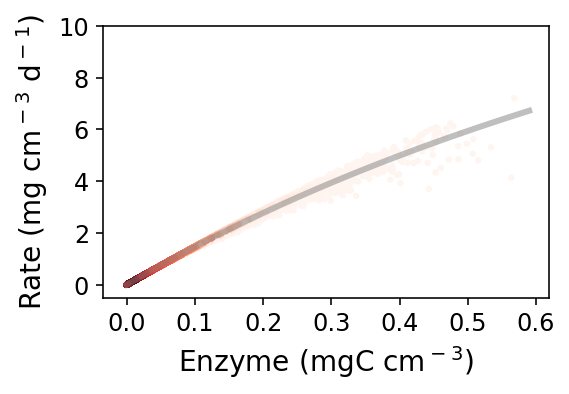

In [94]:
x = np.arange(0,0.60,0.01)
#predicted rate
RMM_Rate = RMM(Rate_Sub_Enz['Substrate'],x)

#y_min = 0.19498 *  131.068673 * x /(1.51204+x)
#y_max = 0.19498 *  131.068673 * x /(1.51204+x)

fig, ax = plt.subplots(figsize=(4,2.5))

yy = (Rate_Sub_Enz[['Enzyme','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))

ax.scatter(Rate_Sub_Enz['Enzyme'],Rate_Sub_Enz['Rate'],s=5,color=colours,zorder = 1)

ax.plot(x,RMM_Rate,'-',color='grey',linewidth = 3,alpha = 0.5)

#ax.plot(x,y_max,'-',color='grey',linewidth = 2,alpha = 0.5)
# ax.plot(x,y_min,'-',color='grey',linewidth = 3,alpha = 0.5)
# ax.fill_between(x,y_min,y_max,facecolor='grey', alpha= 0.5,zorder = 2)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-0.5,10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Enzyme_140.pdf',bbox_inches='tight')

In [84]:
Enz_index = Rate_Sub_Enz['Substrate'] <= (max(Rate_Sub_Enz['Substrate']) -min(Rate_Sub_Enz['Substrate'])) * 0.15 + min(Rate_Sub_Enz['Substrate'])
Enz_MM = Rate_Sub_Enz['Enzyme'][Enz_index]
Enz_MM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    822.000000
mean       0.540673
std        0.107540
min        0.279884
10%        0.409957
25%        0.461417
50%        0.532581
75%        0.605522
90%        0.694478
max        0.956784
Name: Enzyme, dtype: float64

In [16]:
x_enz = Rate_Sub_Enz['Enzyme']
x_enz.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    10000.000000
mean         0.092463
std          0.089537
min          0.000000
10%          0.000000
25%          0.017428
50%          0.067151
75%          0.146444
90%          0.221235
max          0.568209
Name: Enzyme, dtype: float64

In [13]:
def MM(Substrate,Enzyme):
    Vmax = 18.80
    K    = 37.74
    Rate = Substrate*Enzyme*Vmax/(K+ Substrate)
    
    return Rate

In [15]:
# predicted rate 
Rate_MM = MM(Rate_Sub_Enz['Substrate'],Rate_Sub_Enz['Enzyme'])

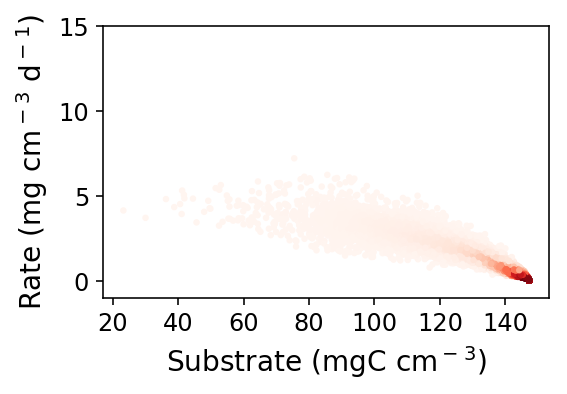

In [58]:
x = np.arange(0,150,1)

#y_min = 11.68 * 0.092463 * x/(13.09 + x)
#y_mid = 19.13 * 0.092463 * x/(21.44 + x)
#y_max = 36.72 * 0.092463 * x/(41.16 + x)



fig, ax = plt.subplots(figsize=(4,2.5))

yy = (Rate_Sub_Enz[['Substrate','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))

#ax.plot(Rate_Sub_Enz['Substrate'],Rate_MM, linewidth = 2,alpha=0.5)

ax.scatter(Rate_Sub_Enz['Substrate'],Rate_Sub_Enz['Rate'],s=5,color=colours,zorder=1)
#ax.plot(x,y_min,'-',color='grey',linewidth = 2,alpha=0.5)
#ax.plot(x,y_mid,'-',color='grey',linewidth = 2,alpha=0.5)
#ax.plot(x,y_max,'-',color='grey',linewidth = 2,alpha=0.5)



#ax.fill_between(x, y_min,y_max,facecolor = 'grey',alpha=0.5,zorder=2)


ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-1,15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Substrate_140.pdf',bbox_inches='tight')

# Day = 150

## Substrate

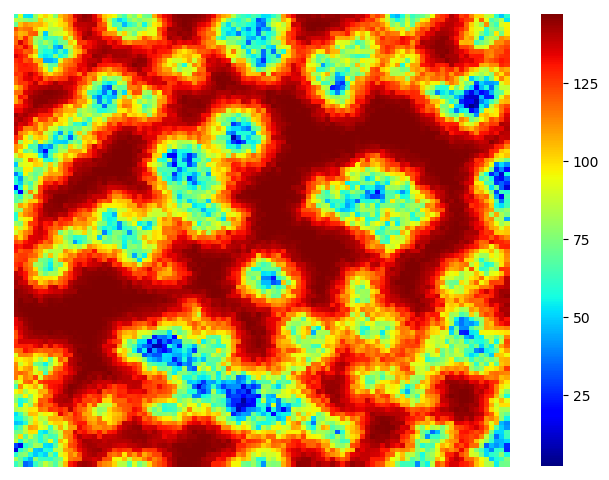

In [95]:
Substrate = pd.read_csv('Substrate_150.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)

sns.heatmap (Substrate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'
#plt.title('Day:101',size = 14)

#plt.savefig('DAY_1',bbox_inches='tight')

In [64]:
Substrate_Left = Substrate_c.sum()
Initial_Substrate = 1472924.0
Substrate_Left/Initial_Substrate

0.7652206528527777

# Enzyme

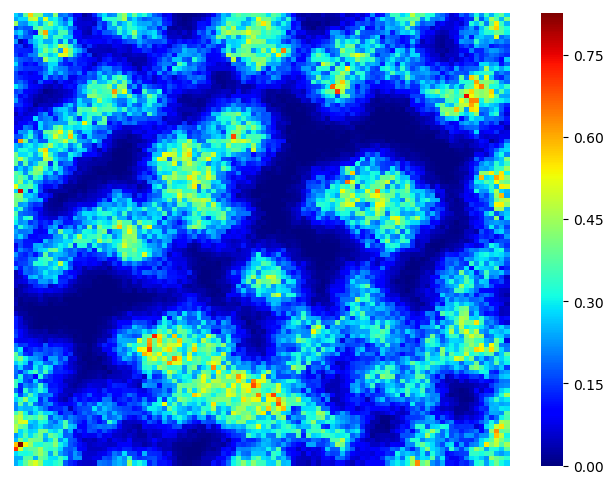

In [18]:
Enzyme = pd.read_csv('Enzyme_150.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)

sns.heatmap (Enzyme_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

# Rate

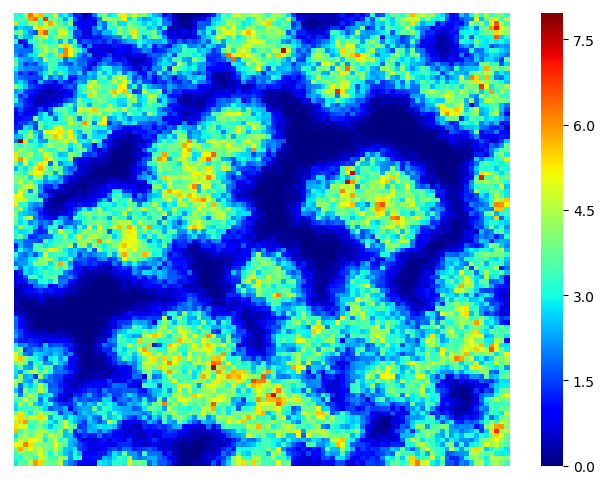

In [19]:
Rate = pd.read_csv('DecayRates_150.csv',index_col = 0)

Rate_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid[i-1] = Rate.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Rate_Grid)
df.columns = ['C']

Rate_c = df['C']
Rate_c_grid = Rate_c.copy().values.reshape(100,100)

plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)
sns.heatmap (Rate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

Text(0, 0.5, 'Rate (mg cm$^-$$^3$ d$^-$$^1$)')

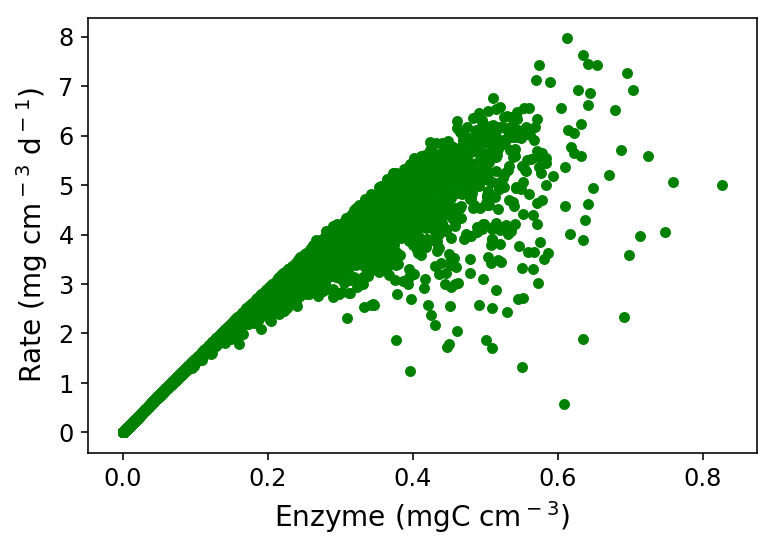

In [20]:
Rate_Enz = pd.DataFrame({"Rate":Rate_c,'Enzyme':Enzyme_c})
Rate_Enz.head()

Enzyme_Fig = Rate_Enz.plot.scatter(x='Enzyme',y='Rate',color ='green',fontsize = 12)

Enzyme_Fig.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
Enzyme_Fig.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

Text(0, 0.5, 'Rate (mg cm$^-$$^3$ d$^-$$^1$)')

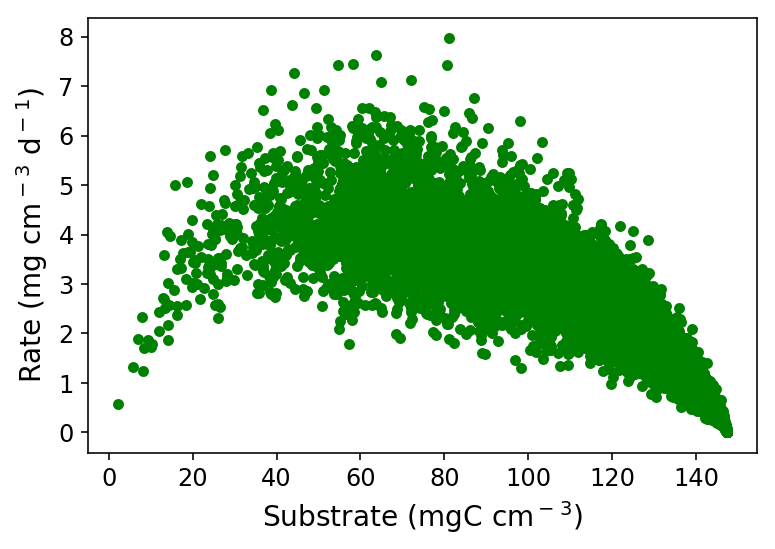

In [21]:
Rate_Sub = pd.DataFrame({"Rate":Rate_c,'Substrate':Substrate_c})
Rate_Sub.head()
Sub_Fig = Rate_Sub.plot.scatter(x='Substrate',y='Rate',color='green',fontsize = 12)

Sub_Fig.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
Sub_Fig.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

# Day = 155

## Substrate

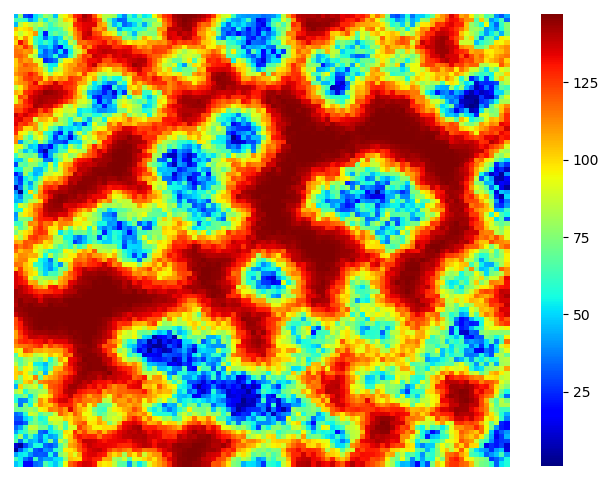

In [172]:
Substrate = pd.read_csv('Substrate_155.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)

sns.heatmap (Substrate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'
#plt.title('Day:101',size = 14)

#plt.savefig('DAY_1',bbox_inches='tight')

# Enzyme

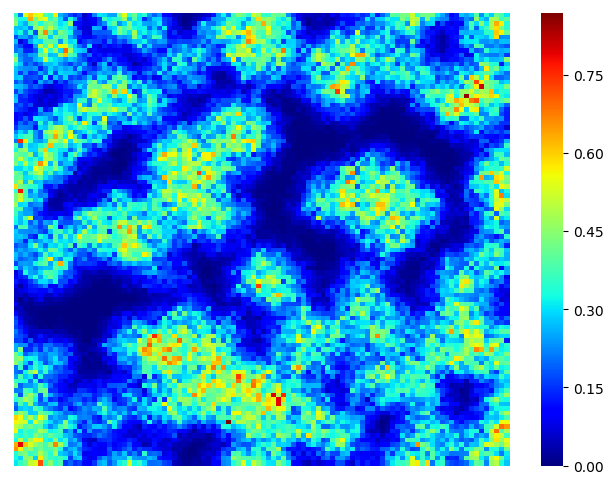

In [173]:
Enzyme = pd.read_csv('Enzyme_155.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)

sns.heatmap (Enzyme_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

# Rate

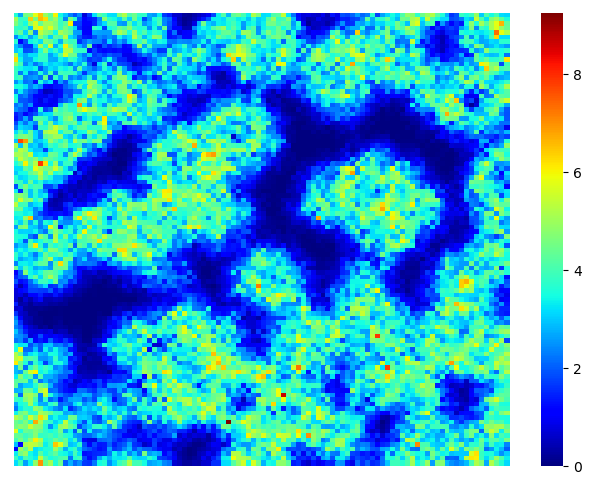

In [174]:
Rate = pd.read_csv('DecayRates_155.csv',index_col = 0)

Rate_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid[i-1] = Rate.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Rate_Grid)
df.columns = ['C']

Rate_c = df['C']
Rate_c_grid = Rate_c.copy().values.reshape(100,100)

plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)
sns.heatmap (Rate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

Text(0, 0.5, 'Rate (mg cm$^-$$^3$ d$^-$$^1$)')

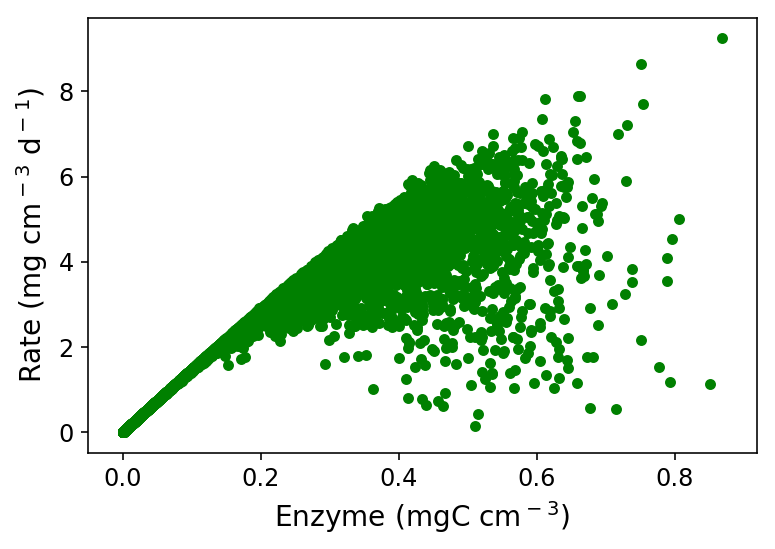

In [175]:
Rate_Enz = pd.DataFrame({"Rate":Rate_c,'Enzyme':Enzyme_c})
Rate_Enz.head()

Enzyme_Fig = Rate_Enz.plot.scatter(x='Enzyme',y='Rate',color ='green',fontsize = 12)

Enzyme_Fig.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
Enzyme_Fig.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

### ----Use pyplot to plot the data and line

In [178]:
x = np.arange(0,0.90,0.01)
y = 7.6438*x/(0.4139+x)

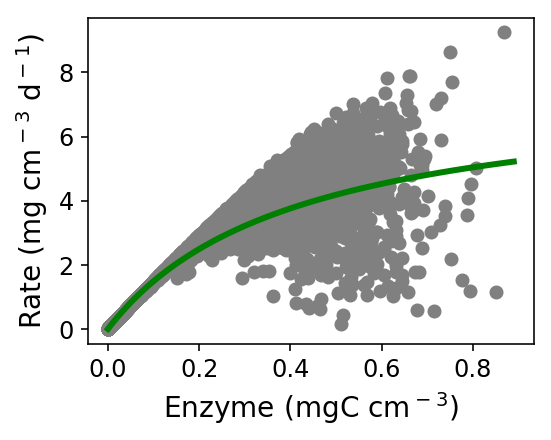

In [180]:
fig, ax = plt.subplots(figsize=(4,3))

ax.plot(Rate_Enz['Enzyme'],Rate_Enz['Rate'],'o',color='grey')
ax.plot(x,y,'-',color='green',linewidth = 3)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Enzyme_155.pdf',bbox_inches='tight')

Text(0, 0.5, 'Rate (mg cm$^-$$^3$ d$^-$$^1$)')

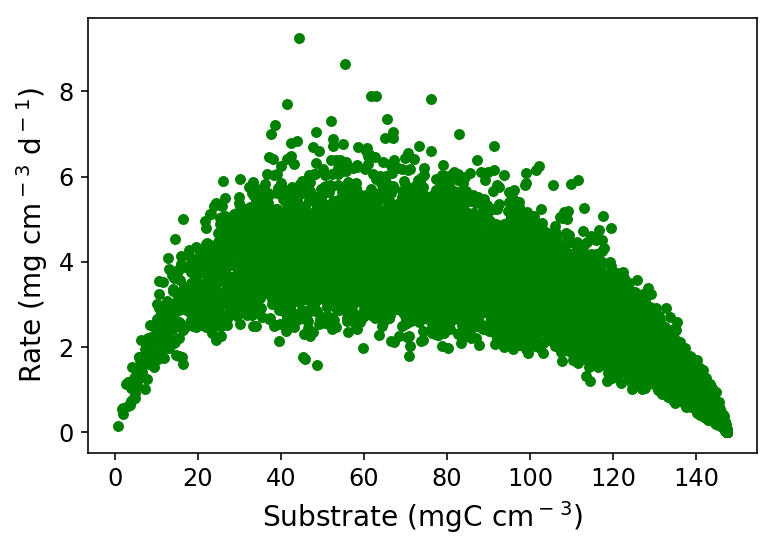

In [181]:
Rate_Sub = pd.DataFrame({"Rate":Rate_c,'Substrate':Substrate_c})
Rate_Sub.head()
Sub_Fig = Rate_Sub.plot.scatter(x='Substrate',y='Rate',color='green',fontsize = 12)

Sub_Fig.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
Sub_Fig.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')

## ----use pyplot to plot the data instead

In [182]:
x_enz = Rate_Enz['Enzyme']
x_enz.describe()

count    10000.000000
mean         0.229146
std          0.150416
min          0.000000
25%          0.105078
50%          0.222005
75%          0.331476
max          0.869087
Name: Enzyme, dtype: float64

In [183]:
x = np.arange(0,150,1)

y_min = 11.68 * 0.229146* x/(13.09 + x)
y_mid = 19.13 * 0.229146* x/(21.44 + x)
y_max = 36.72 * 0.229146* x/(41.16 + x)

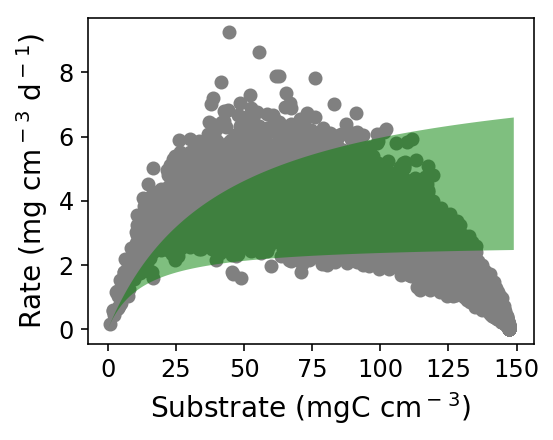

In [185]:
fig, ax = plt.subplots(figsize=(4,3))


# ax.plot(x_sub,y1,'.',color='red',linewidth=4)
# ax.plot(x_sub,y2,'.',color='black',linewidth=4)
# ax.plot(x_sub,y3,'.',color='green',linewidth=4)


ax.plot(Rate_Sub['Substrate'],Rate_Sub['Rate'],'o',color='grey',zorder=1)

#ax.plot(x,y_min,'--',color='green', linewidth = 2)
# ax.plot(x,y_mid,'-',color='gold',linewidth=4)
#ax.plot(x,y_max,'--',color='green',linewidth = 2)
ax.fill_between(x, y_min,y_max,facecolor = 'green',alpha=0.5,zorder=2)


ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Substrate_155.pdf',bbox_inches='tight')

# Day = 160

## Substrate

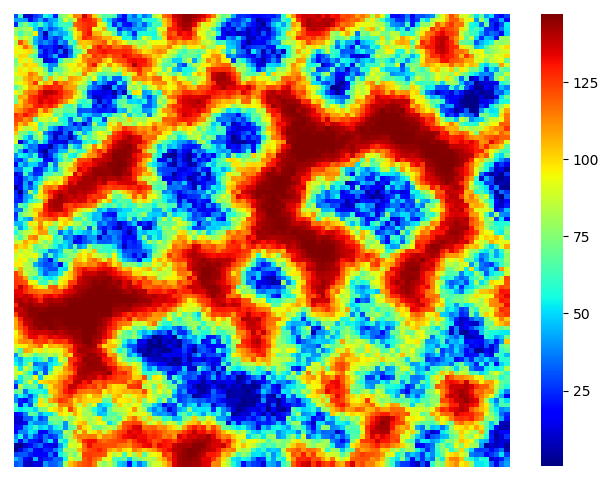

In [96]:
Substrate = pd.read_csv('Substrate_160.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)

sns.heatmap (Substrate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'
#plt.title('Day:101',size = 14)

#plt.savefig('DAY_1',bbox_inches='tight')

# Enzyme

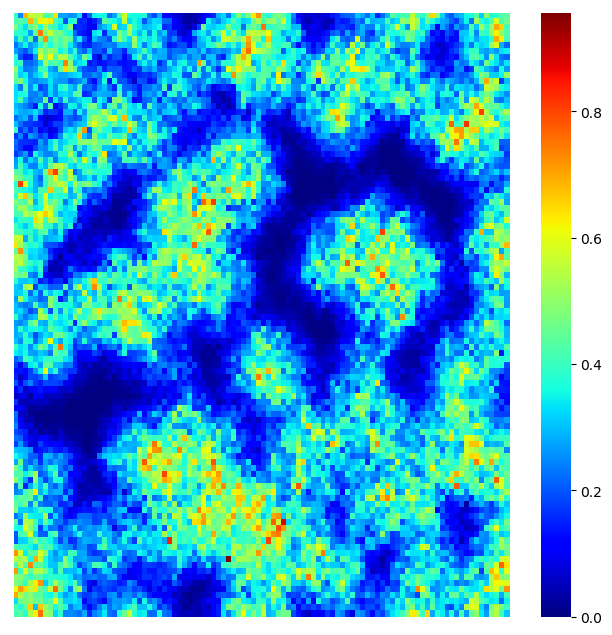

In [97]:
Enzyme = pd.read_csv('Enzyme_160.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)
plt.figure(figsize = (8,8),dpi = 50) #figsize = (10,8)

sns.heatmap (Enzyme_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

# Rate

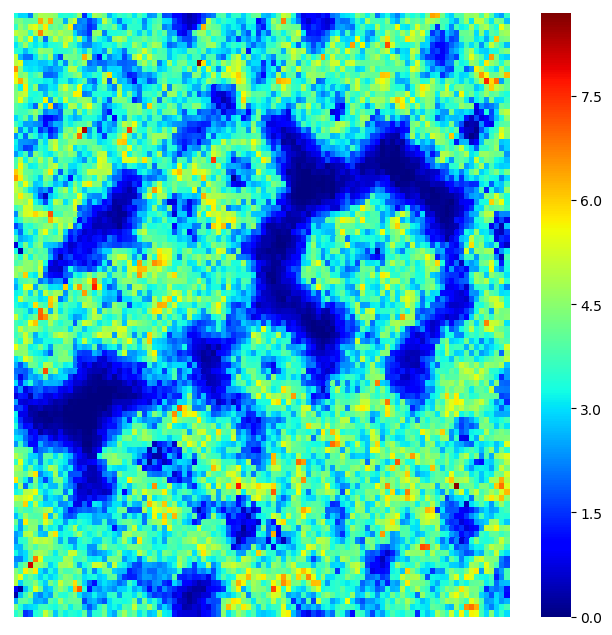

In [98]:
Rate = pd.read_csv('DecayRates_160.csv',index_col = 0)

Rate_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid[i-1] = Rate.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Rate_Grid)
df.columns = ['C']

Rate_c = df['C']
Rate_c_grid = Rate_c.copy().values.reshape(100,100)

plt.figure(figsize = (8,8),dpi = 50) #figsize = (10,8)
sns.heatmap (Rate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

In [99]:
Rate_Sub_Enz = pd.DataFrame({"Rate":Rate_c,'Substrate':Substrate_c,'Enzyme':Enzyme_c})
Rate_Sub_Enz.head()
Rate_Sub_Enz.to_csv('Cellulose_Rate_Sub_Enz_160.csv')

In [100]:
Sub_index = Rate_Sub_Enz['Enzyme'] <= (max(Rate_Sub_Enz['Enzyme']) - min(Rate_Sub_Enz['Enzyme'])) * 0.15 + min(Rate_Sub_Enz['Enzyme'])
Sub_RMM = Rate_Sub_Enz['Substrate'][Sub_index]
Sub_RMM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    2194.000000
mean      137.781713
std         7.820332
min       105.835163
10%       126.810083
25%       132.975059
50%       139.375051
75%       144.285518
90%       146.603307
max       147.292400
Name: Substrate, dtype: float64

In [101]:
x_sub = Rate_Sub_Enz['Substrate']
x_sub.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    10000.000000
mean        85.228595
std         41.572091
min          0.374163
10%         26.161541
25%         50.700206
50%         87.744059
75%        122.624490
90%        140.179598
max        147.292400
Name: Substrate, dtype: float64

In [102]:
def RMM(Substrate,Enzyme):
    Vmax = 6.3237
    K    = 0.2476
    Rate = Enzyme*Vmax/(K+ Enzyme)
    
    return Rate

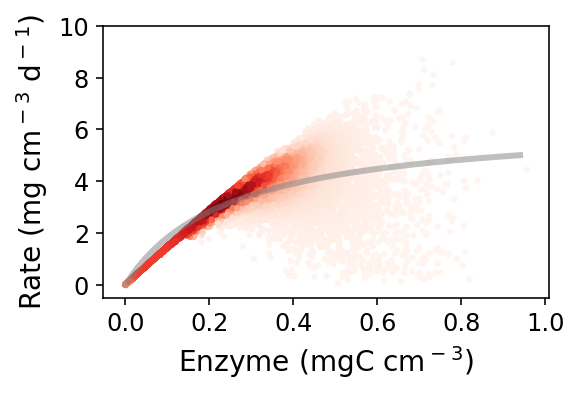

In [103]:
x = np.arange(0,0.95,0.01)
#predicted rate
RMM_Rate = RMM(Rate_Sub_Enz['Substrate'],x)
#y_min = 0.19498 * 85.228595 * x /(1.51204+x)
#y_max = 0.19498 * 146.603307 * x /(1.51204+x)

fig, ax = plt.subplots(figsize=(4,2.5))

yy = (Rate_Sub_Enz[['Enzyme','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))

ax.scatter(Rate_Sub_Enz['Enzyme'],Rate_Sub_Enz['Rate'],s=5,color=colours,zorder = 1)
ax.plot(x,RMM_Rate,'-',color='grey',linewidth=3,alpha = 0.5)

#ax.plot(x,y_min,'-',color='grey',linewidth=2,alpha = 0.5)
#ax.plot(x,y_max,'-',color='green',linewidth=3)
#ax.fill_between(x,y_min,y_max,facecolor= 'grey', alpha = 0.5,zorder = 2)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-0.5,10)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Enzyme_160.pdf',bbox_inches='tight')

count    10000.000000
mean         0.283018
std          0.160564
min          0.000000
10%          0.061224
25%          0.161827
50%          0.283232
75%          0.391007
90%          0.489981
max          0.956784
Name: Enzyme, dtype: float64

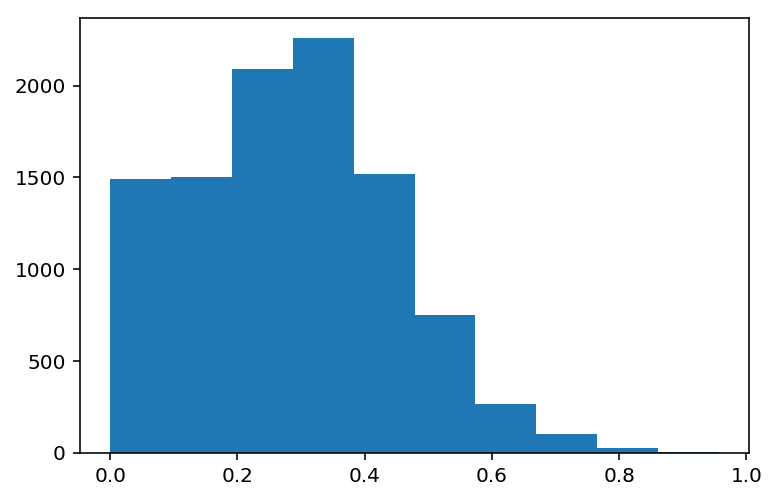

In [24]:
x_enz = Rate_Sub_Enz['Enzyme']
plt.hist(x_enz)
x_enz.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

In [146]:
Enz_index = Rate_Sub_Enz['Substrate'] <= (max(Rate_Sub_Enz['Substrate']) -min(Rate_Sub_Enz['Substrate'])) * 0.15 + min(Rate_Sub_Enz['Substrate'])
Enz_MM = Rate_Sub_Enz['Enzyme'][Enz_index]
Enz_MM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    822.000000
mean       0.540673
std        0.107540
min        0.279884
10%        0.409957
25%        0.461417
50%        0.532581
75%        0.605522
90%        0.694478
max        0.956784
Name: Enzyme, dtype: float64

In [106]:
def MM(Substrate,Enzyme):
    Vmax = 6.3237 
    K    = 0.2476
    Rate = Substrate*Vmax/(K+ Substrate)
    
    return Rate

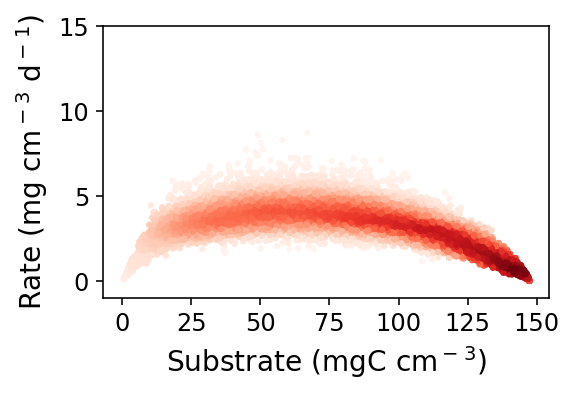

In [109]:
x = np.arange(0,150,1)
# predicted rate 
Rate_MM = MM(x,Rate_Sub_Enz['Enzyme'])

#y_min = 11.68 * 0.283018* x/(13.09 + x)
#y_max = 36.72 * 0.283018* x/(41.16 + x)
#y_mid = 19.13 * 0.283018* x/(21.44 + x)


fig, ax = plt.subplots(figsize=(4,2.5))


yy = (Rate_Sub_Enz[['Substrate','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))

ax.scatter(Rate_Sub_Enz['Substrate'],Rate_Sub_Enz['Rate'],s=5,color=colours,zorder=1)
#ax.plot(x,Rate_MM,'-',color='grey', linewidth = 2,alpha = 0.5)

#ax.plot(x,y_min,'-',color='grey', linewidth = 2,alpha = 0.5)
#ax.plot(x,y_mid,'-',color='grey', linewidth = 2,alpha = 0.5)
#ax.plot(x,y_max,'-',color='grey', linewidth = 2,alpha = 0.5)

#ax.fill_between(x, y_min,y_max,facecolor = 'grey',alpha=0.5,zorder=2)


ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-1,15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Substrate_160.pdf',bbox_inches='tight')

# Day = 200

## Substrate

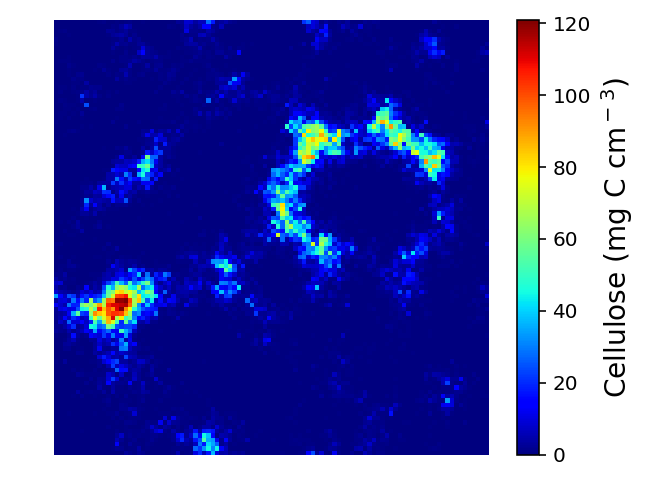

In [110]:
Substrate = pd.read_csv('Substrate_200.csv',index_col = 0)

Substrate_Grid = np.zeros((10000,3))
for i in np.arange(1,10001,1):
      Substrate_Grid[i-1] = Substrate.iloc[(Subindex + 12*(i-1)),]
        
index = ['C','N','P']   
df = pd.DataFrame(Substrate_Grid)
df.columns = index

Substrate_c = df['C']
Substrate_c_grid = Substrate_c.copy().values.reshape(100,100)

plt.figure(figsize=(5, 4))
plt.grid(linestyle='')

xx = plt.imshow(Substrate_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical',ticks=[0,20,40,60,80,100,120])
cbar.set_label('Cellulose (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Substrate_Distribution_200.pdf',bbox_inches='tight')

## Enzyme

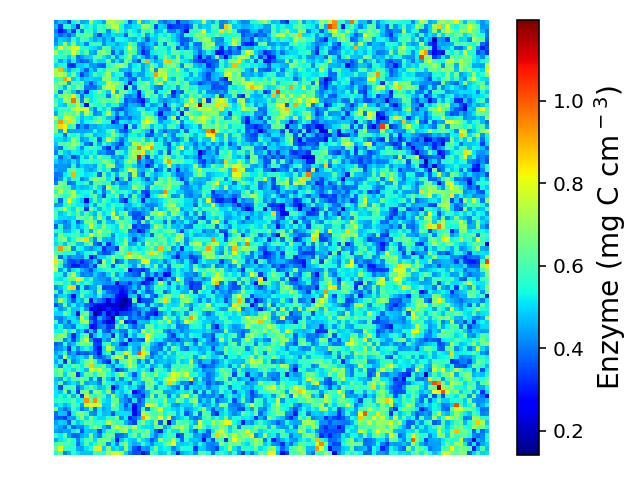

In [111]:
Enzyme = pd.read_csv('Enzyme_200.csv',index_col = 0)

Enzyme_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
    #Enzyme_Grid[i-1] = Enzyme.iloc[(0+12*(i-1)):(12+12*(i-1)),].sum()
    Enzyme_Grid[i-1]  = Enzyme.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Enzyme_Grid)
df.columns = ['C']

Enzyme_c = df['C']
Enzyme_c_grid = Enzyme_c.copy().values.reshape(100,100)


plt.figure(figsize=(5, 4))
plt.grid(linestyle='')

xx = plt.imshow(Enzyme_c_grid,cmap='jet')
plt.axis('off')

cbar = plt.colorbar(xx,orientation='vertical')
cbar.set_label('Enzyme (mg C cm$^-$$^3$)',size=14)

#plt.savefig('Enzyme_Distribution_200.pdf',bbox_inches='tight')

# Rate

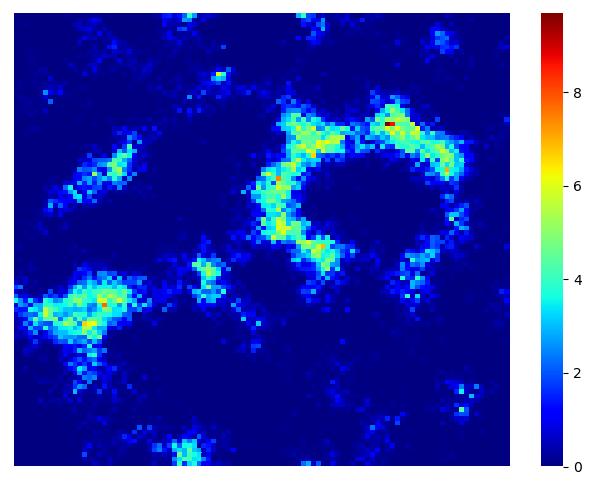

In [112]:
Rate = pd.read_csv('DecayRates_200.csv',index_col = 0)

Rate_Grid = np.zeros((10000,1))
for i in np.arange(1,10001,1):
      Rate_Grid[i-1] = Rate.iloc[(Subindex + 12*(i-1)),]
        
        
df = pd.DataFrame(Rate_Grid)
df.columns = ['C']

Rate_c = df['C']
Rate_c_grid = Rate_c.copy().values.reshape(100,100)

plt.figure(figsize = (8,6),dpi = 50) #figsize = (10,8)
sns.heatmap (Rate_c_grid,linewidths=0,xticklabels=False,yticklabels=False,
             cmap ='jet', annot = False,cbar = True)  #cmap = 'plasma'

In [116]:
Rate_Sub_Enz = pd.DataFrame({"Rate":Rate_c,'Substrate':Substrate_c,'Enzyme':Enzyme_c})
Rate_Sub_Enz.head()
Rate_Sub_Enz.to_csv('Cellulose_Rate_Sub_Enz_200.csv')

In [114]:
Sub_index = Rate_Sub_Enz['Enzyme'] <= (max(Rate_Sub_Enz['Enzyme']) -min(Rate_Sub_Enz['Enzyme'])) * 0.15 + min(Rate_Sub_Enz['Enzyme'])
Sub_RMM = Rate_Sub_Enz['Substrate'][Sub_index]
Sub_RMM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    178.000000
mean      37.530201
std       39.069098
min        0.027803
10%        0.326927
25%        1.373665
50%       23.300364
75%       72.134164
90%       97.896993
max      121.019900
Name: Substrate, dtype: float64

count    10000.000000
mean         4.463520
std         12.564617
min          0.000029
10%          0.012935
25%          0.058997
50%          0.313026
75%          1.833052
90%         11.271562
max        121.019900
Name: Substrate, dtype: float64

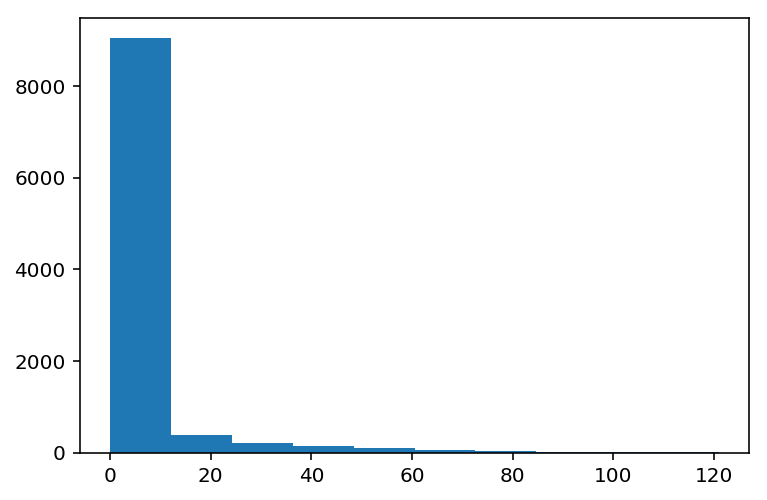

In [115]:
x_sub = Rate_Sub_Enz['Substrate']
plt.hist(x_sub)
x_sub.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

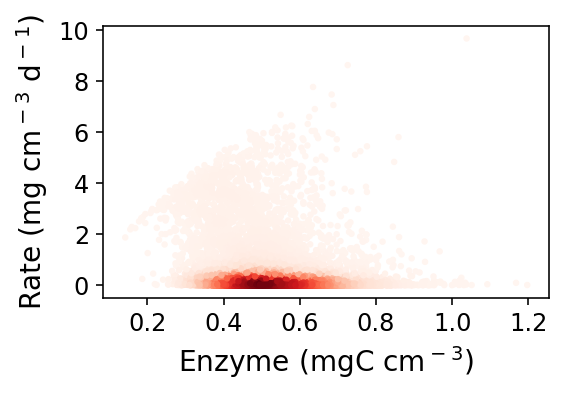

In [117]:
x = np.arange(0,1.20,0.01)
y_min = 0.19498 * 4.463520 * x /(1.51204+x)
#y_max = 0.19498 * 97.896993 * x /(1.51204+x)

fig, ax = plt.subplots(figsize=(4,2.5))

yy = (Rate_Sub_Enz[['Enzyme','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))

ax.scatter(Rate_Sub_Enz['Enzyme'],Rate_Sub_Enz['Rate'],s=5,color = colours,zorder = 1)
#ax.plot(x,y_min,'-',color='grey',linewidth=2,alpha = 0.5)

#ax.fill_between(x,y_min,y_max, facecolor = 'grey',alpha = 0.5, zorder = 2)

ax.set_xlabel("Enzyme (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Enzyme_200.pdf',bbox_inches='tight')

In [177]:
Enz_index = Rate_Sub_Enz['Substrate'] <= (max(Rate_Sub_Enz['Substrate']) -min(Rate_Sub_Enz['Substrate'])) * 0.15 + min(Rate_Sub_Enz['Substrate'])
Enz_MM = Rate_Sub_Enz['Enzyme'][Enz_index]
Enz_MM.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

count    9252.000000
mean        0.530423
std         0.117928
min         0.186874
10%         0.388925
25%         0.448030
50%         0.517894
75%         0.602086
90%         0.683816
max         1.196819
Name: Enzyme, dtype: float64

count    10000.000000
mean         0.521817
std          0.120996
min          0.142232
10%          0.375621
25%          0.438718
50%          0.511355
75%          0.596420
90%          0.677659
max          1.196819
Name: Enzyme, dtype: float64

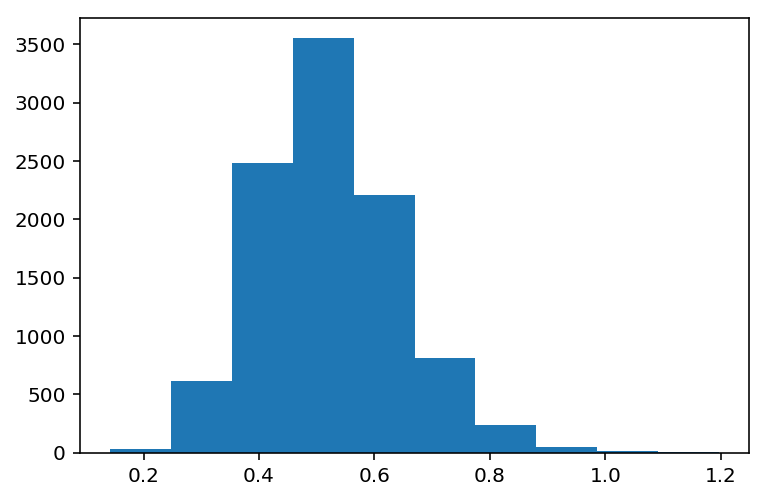

In [32]:
x_enz = Rate_Sub_Enz['Enzyme']
plt.hist(x_enz)
x_enz.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

In [118]:
def MM(Substrate,Enzyme):
    Vmax = 5.862 
    K    = 20.781
    Rate = Substrate*Vmax/(K+ Substrate)
    
    return Rate

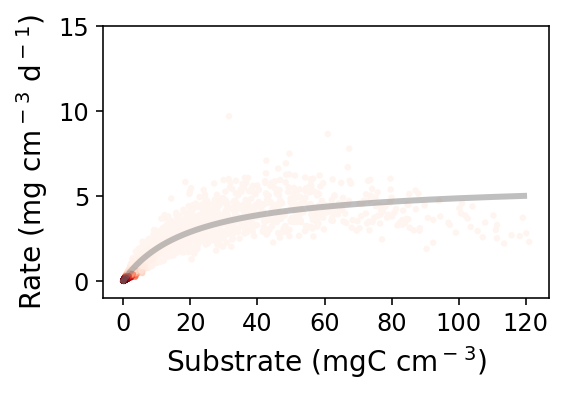

In [120]:
x = np.arange(0,120,0.5)
Rate_MM = MM(x,Rate_Sub_Enz['Enzyme'])
#y_min = 11.68 *  0.521817* x/(13.09 + x)
#y_mid = 19.13 *  0.521817* x/(21.44 + x)
#y_max = 36.72 *  0.521817* x/(41.16 + x)

fig, ax = plt.subplots(figsize=(4,2.5))


yy = (Rate_Sub_Enz[['Substrate','Rate']].T).values
densObj = kde(yy)
colours = makeColours(densObj.evaluate(yy))


ax.scatter(Rate_Sub_Enz['Substrate'],Rate_Sub_Enz['Rate'],s=5,color=colours,zorder=1)
ax.plot(x,Rate_MM,'-',color='grey',linewidth=3,alpha = 0.5)

#ax.plot(x,y_min,'-',color='grey',linewidth=2,alpha = 0.5)
#ax.plot(x,y_mid,'-',color='grey',linewidth=2,alpha = 0.5)
#ax.plot(x,y_max,'-',color='grey',linewidth=2,alpha = 0.5)

#ax.fill_between(x, y_min,y_max,facecolor = 'grey',alpha=0.5,zorder=2)


ax.set_xlabel("Substrate (mgC cm$^-$$^3$)",size=14,weight='normal')
ax.set_ylabel("Rate (mg cm$^-$$^3$ d$^-$$^1$)",size=14,weight='normal')
ax.set_ylim(-1,15)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('Cellulose_Rate_Substrate_200.pdf',bbox_inches='tight')